# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Preprocessing numerical data

### Create data

,count,mean,std,min,25%,50%,75%,max
0,1000.0,0.934234,1.000906,-1.909247,0.219893,0.969794,1.630004,3.890294
1,1000.0,-0.082828,1.135736,-4.004666,-0.880909,-0.075382,0.713826,2.874216


,0,1
0,1.000000,0.898584
1,0.898584,1.000000


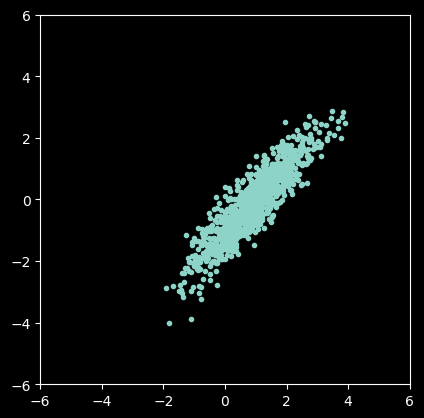

In [28]:
nPts= 1000

a = np.random.normal( 1, 1, nPts)
b = np.random.normal(-1, 0.5, nPts) + a
X = np.array([a,b]).T

df_X = pd.DataFrame(X)
display(df_X.describe().T)
display(df_X.corr())

plt.plot( X[:,0], X[:,1], '.' )
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal')

### Standard scaler (convert to z-score: mean=0, std=1)

,count,mean,std,min,25%,50%,75%,max
0,1000.0,1.243450e-17,1.0005,-2.842329,-0.714052,0.035546,0.695488,2.954862
1,1000.0,-1.865175e-17,1.0005,-3.454851,-0.703050,0.006560,0.701794,2.604939


,0,1
0,1.000000,0.898584
1,0.898584,1.000000


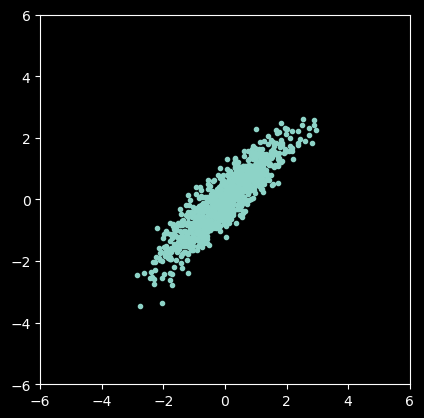

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1 = scaler.fit_transform(X)

df_X1 = pd.DataFrame(X1)
display(df_X1.describe().T)
display(df_X1.corr())

plt.plot( X1[:,0], X1[:,1], '.' )
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal')

### Min max scaler (scale values to between 0 - 1)

,count,mean,std,min,25%,50%,75%,max
0,1000.0,0.490294,0.172584,0.0,0.367122,0.496426,0.610264,1.0
1,1000.0,0.570127,0.165105,0.0,0.454108,0.571210,0.685939,1.0


,0,1
0,1.000000,0.898584
1,0.898584,1.000000


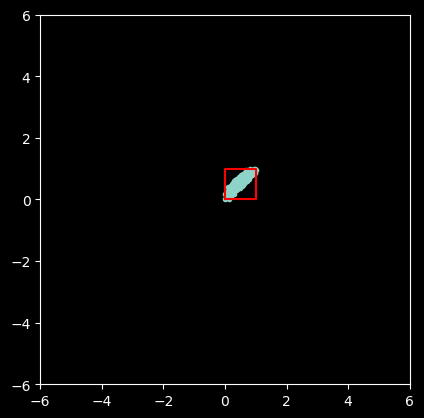

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X2 = scaler.fit_transform(X)

df_X2 = pd.DataFrame(X2)
display(df_X2.describe().T)
display(df_X2.corr())

plt.plot( X2[:,0], X2[:,1], '.' )
plt.plot( [0,1,1,0,0], [0,0,1,1,0], 'r' )
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal')

### PCA (principoal component analysis)

,count,mean,std,min,25%,50%,75%,max
0,1000.0,1.154632e-17,1.475615,-4.090949,-1.067534,-0.017262,1.011831,4.773117
1,1000.0,-3.641532e-17,0.338039,-0.946715,-0.231518,-0.000686,0.228250,1.029940


,0,1
0,1.000000e+00,-1.216460e-16
1,-1.216460e-16,1.000000e+00


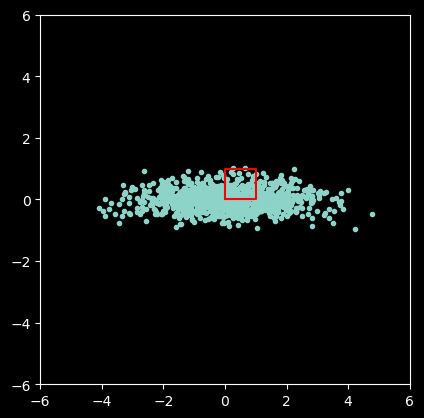

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X3 = pca.fit_transform(X)

df_X3 = pd.DataFrame(X3)
display(df_X3.describe().T)
display(df_X3.corr())

plt.plot( X3[:,0], X3[:,1], '.' )
plt.plot( [0,1,1,0,0], [0,0,1,1,0], 'r' )
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.gca().set_aspect('equal')

### Binarizer (convert values to binary based on a threshold)

In [33]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.5)

X4 = binarizer.fit_transform(X2)

print(X2[:4,:])
print(X4[:4,:])

[[0.54427867 0.74051783]
 [0.51446746 0.61048017]
 [0.35521795 0.62070588]
 [0.37770572 0.42450117]]
[[1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]]


### Preprocessing categorical data

### Create data

In [38]:
# note that this is a 1-d array
text = np.array( ['cat', 'dog', 'bird', 'cat'] )

### label encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
text_LE = LE.fit_transform(text)
text_LE

array([1, 2, 0, 1], dtype=int64)

In [36]:
LE.classes_

array(['bird', 'cat', 'dog'], dtype='<U4')

In [37]:
LE.inverse_transform(text_LE)

array(['cat', 'dog', 'bird', 'cat'], dtype='<U4')

### one hot encoder

In [39]:
# note that this is a 2-d array
text2 = text[:,np.newaxis]
text2

array([['cat'],
       ['dog'],
       ['bird'],
       ['cat']], dtype='<U4')

In [40]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse=False)
text2_OHE = OHE.fit_transform(text2)

text2_OHE

C:\Users\Graham West\anaconda3\envs\csci4900\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [42]:
print(OHE.categories_)

[array(['bird', 'cat', 'dog'], dtype='<U4')]
